In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.shape

(16468, 14)

we have 16468 rows including null value and 14 columns including target variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [6]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Finding Missing Values

In [7]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

There are 14951 null values in each column.

In [8]:
df.dropna(how='all',inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
#dropping Unnamed:0 and year which have no impact on average sales
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  region        1517 non-null   object        
 12  Year          1517 non-null   int64         
 13  Month         1517 non-null   int64         
 14  Day           1517 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [16]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

Label Encoding

In [18]:
label = LabelEncoder()
df["region"] = label.fit_transform(df.region)

In [19]:
#Let's drop the date and type columns
df.drop(['Date','type'],axis=1,inplace=True)

In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,21.196440,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,16.132398,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,6.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,19.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,35.000000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000,2016.000000,12.000000,31.000000


1515 values count in each columns confirm that we do not have any missing values in our data set. 2- Average maximum price is 111 and minimum price is 0 3- Total Volume, Total Bag, 4046, 4770, 1225, Small and Large bags have highest standard deviation 4- Total Number of bag are 1516 and min is 0 5- Average sales in each regoin is 758 bags 6- There are total of 50 regions where avacado's are sold

Checking Correlation

In [21]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,-0.229408,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,0.236579,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,0.269481,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,0.215733,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.138092,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.190001,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.168650,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,0.297452,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,-0.046144,0.218342,0.021452,0.019315
region,-0.229408,0.236579,0.269481,0.215733,0.138092,0.190001,0.168650,0.297452,-0.046144,1.000000,-0.470472,0.000977,-0.028670


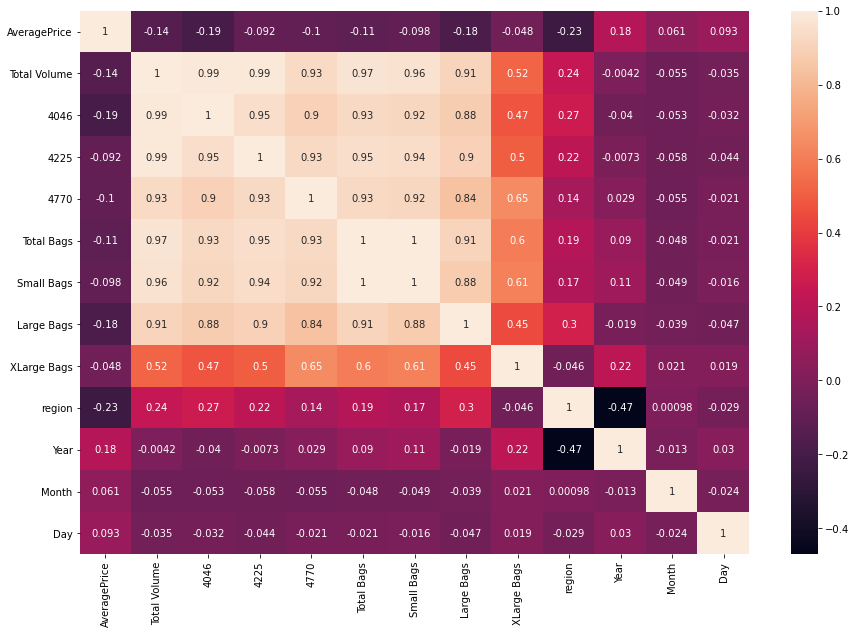

In [22]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

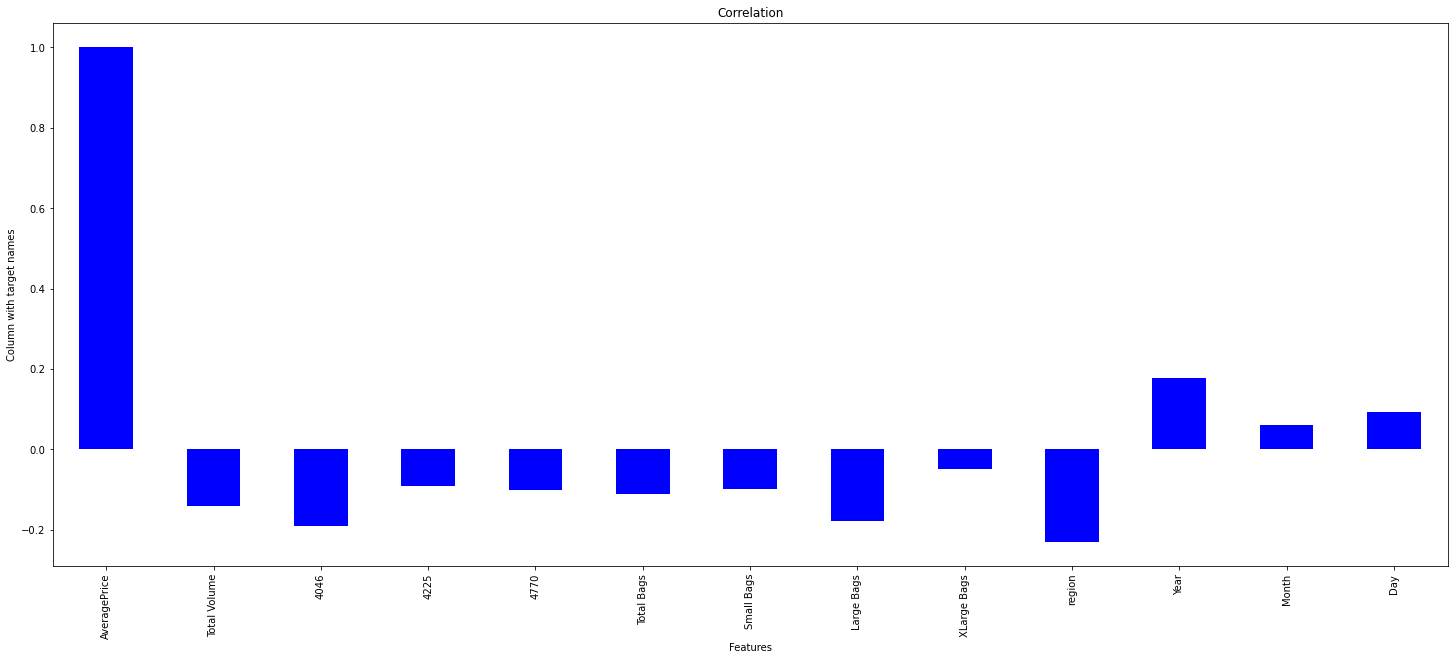

In [23]:
#barplot for correlation
plt.figure(figsize = (25, 10))
df.corr()['AveragePrice'].plot(kind = 'bar', color = 'b')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Total volume, Small bags and and total bags are higly correlated
Average price and Large, Small bags are higly negative correlated
Xlarge bags and region are negatively correlated
All columns are less correlated with Average price

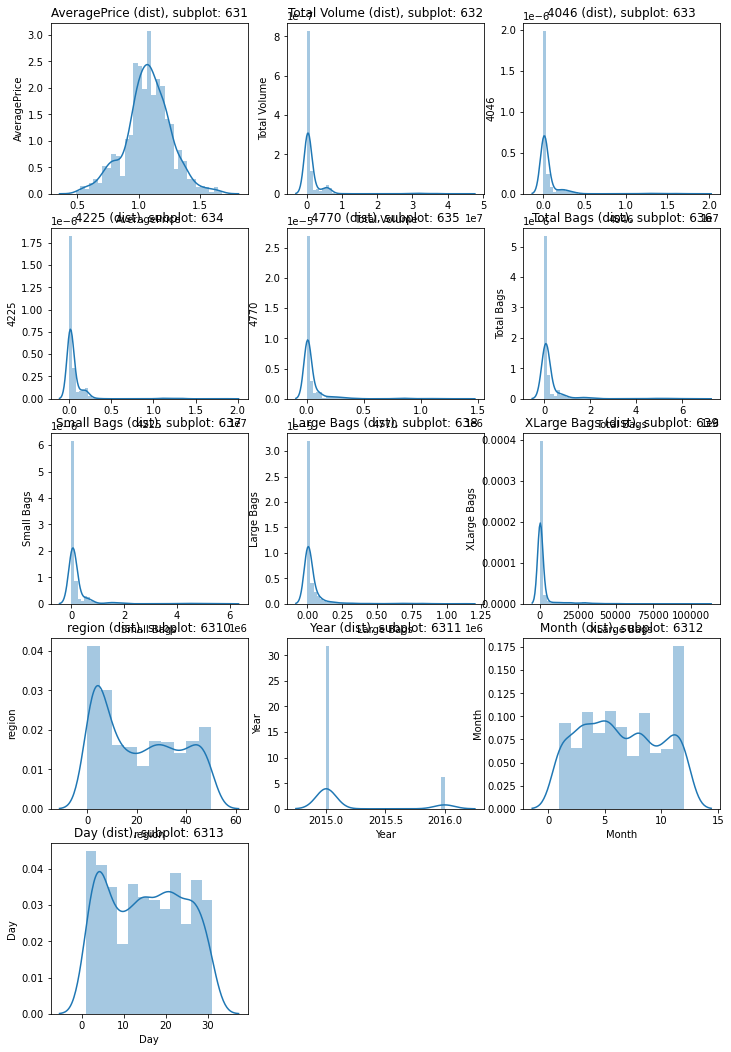

In [24]:
#Distplot for each column
Columns= df.columns

#  plot Numerical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

Here we observe that there is lot of skewness in each column.

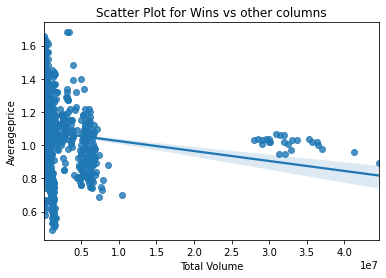

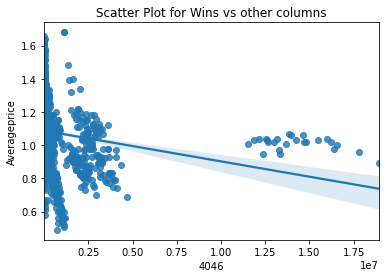

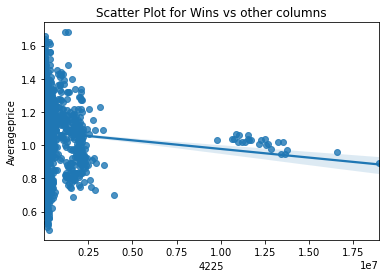

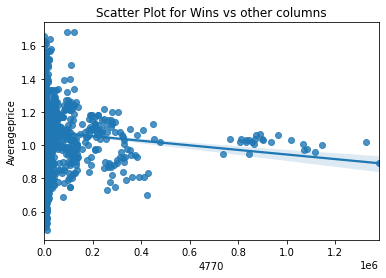

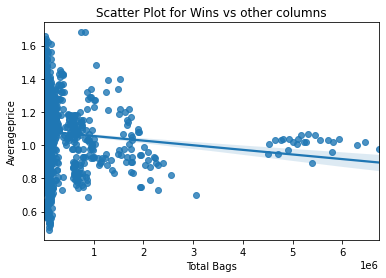

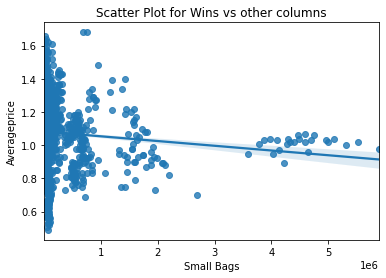

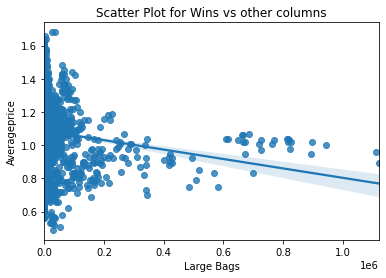

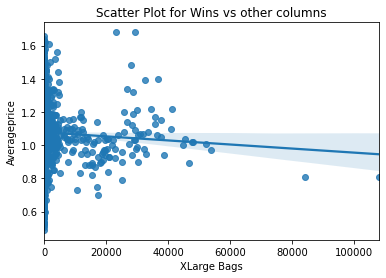

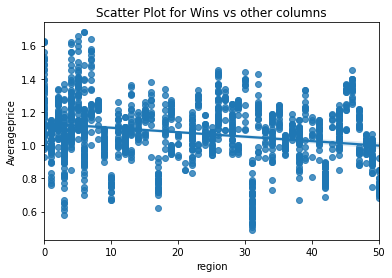

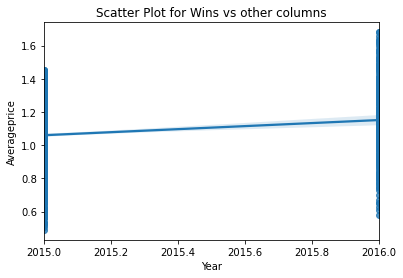

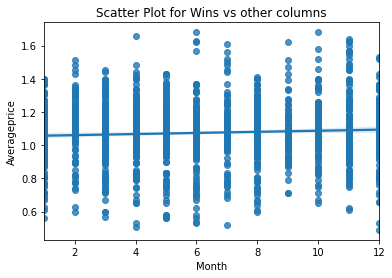

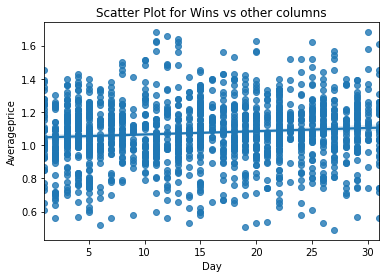

In [25]:
#Checking how W is variated with all columns separately
for i in df.columns[1:]:                                          #bivariate analysis
    plt.figure(figsize = (6, 4))
    sns.regplot(df[i], df['AveragePrice'])
    plt.title('Scatter Plot for Wins vs other columns')
    plt.xlabel(i)
    plt.ylabel('Averageprice')
    plt.show()

Due to this columns Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags ther Averageprice decreases.

In all regions the Averageprice is almost same.

In year 2015-2016 the Averageprice is increased.

In days and months the Average price is almost same.

Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

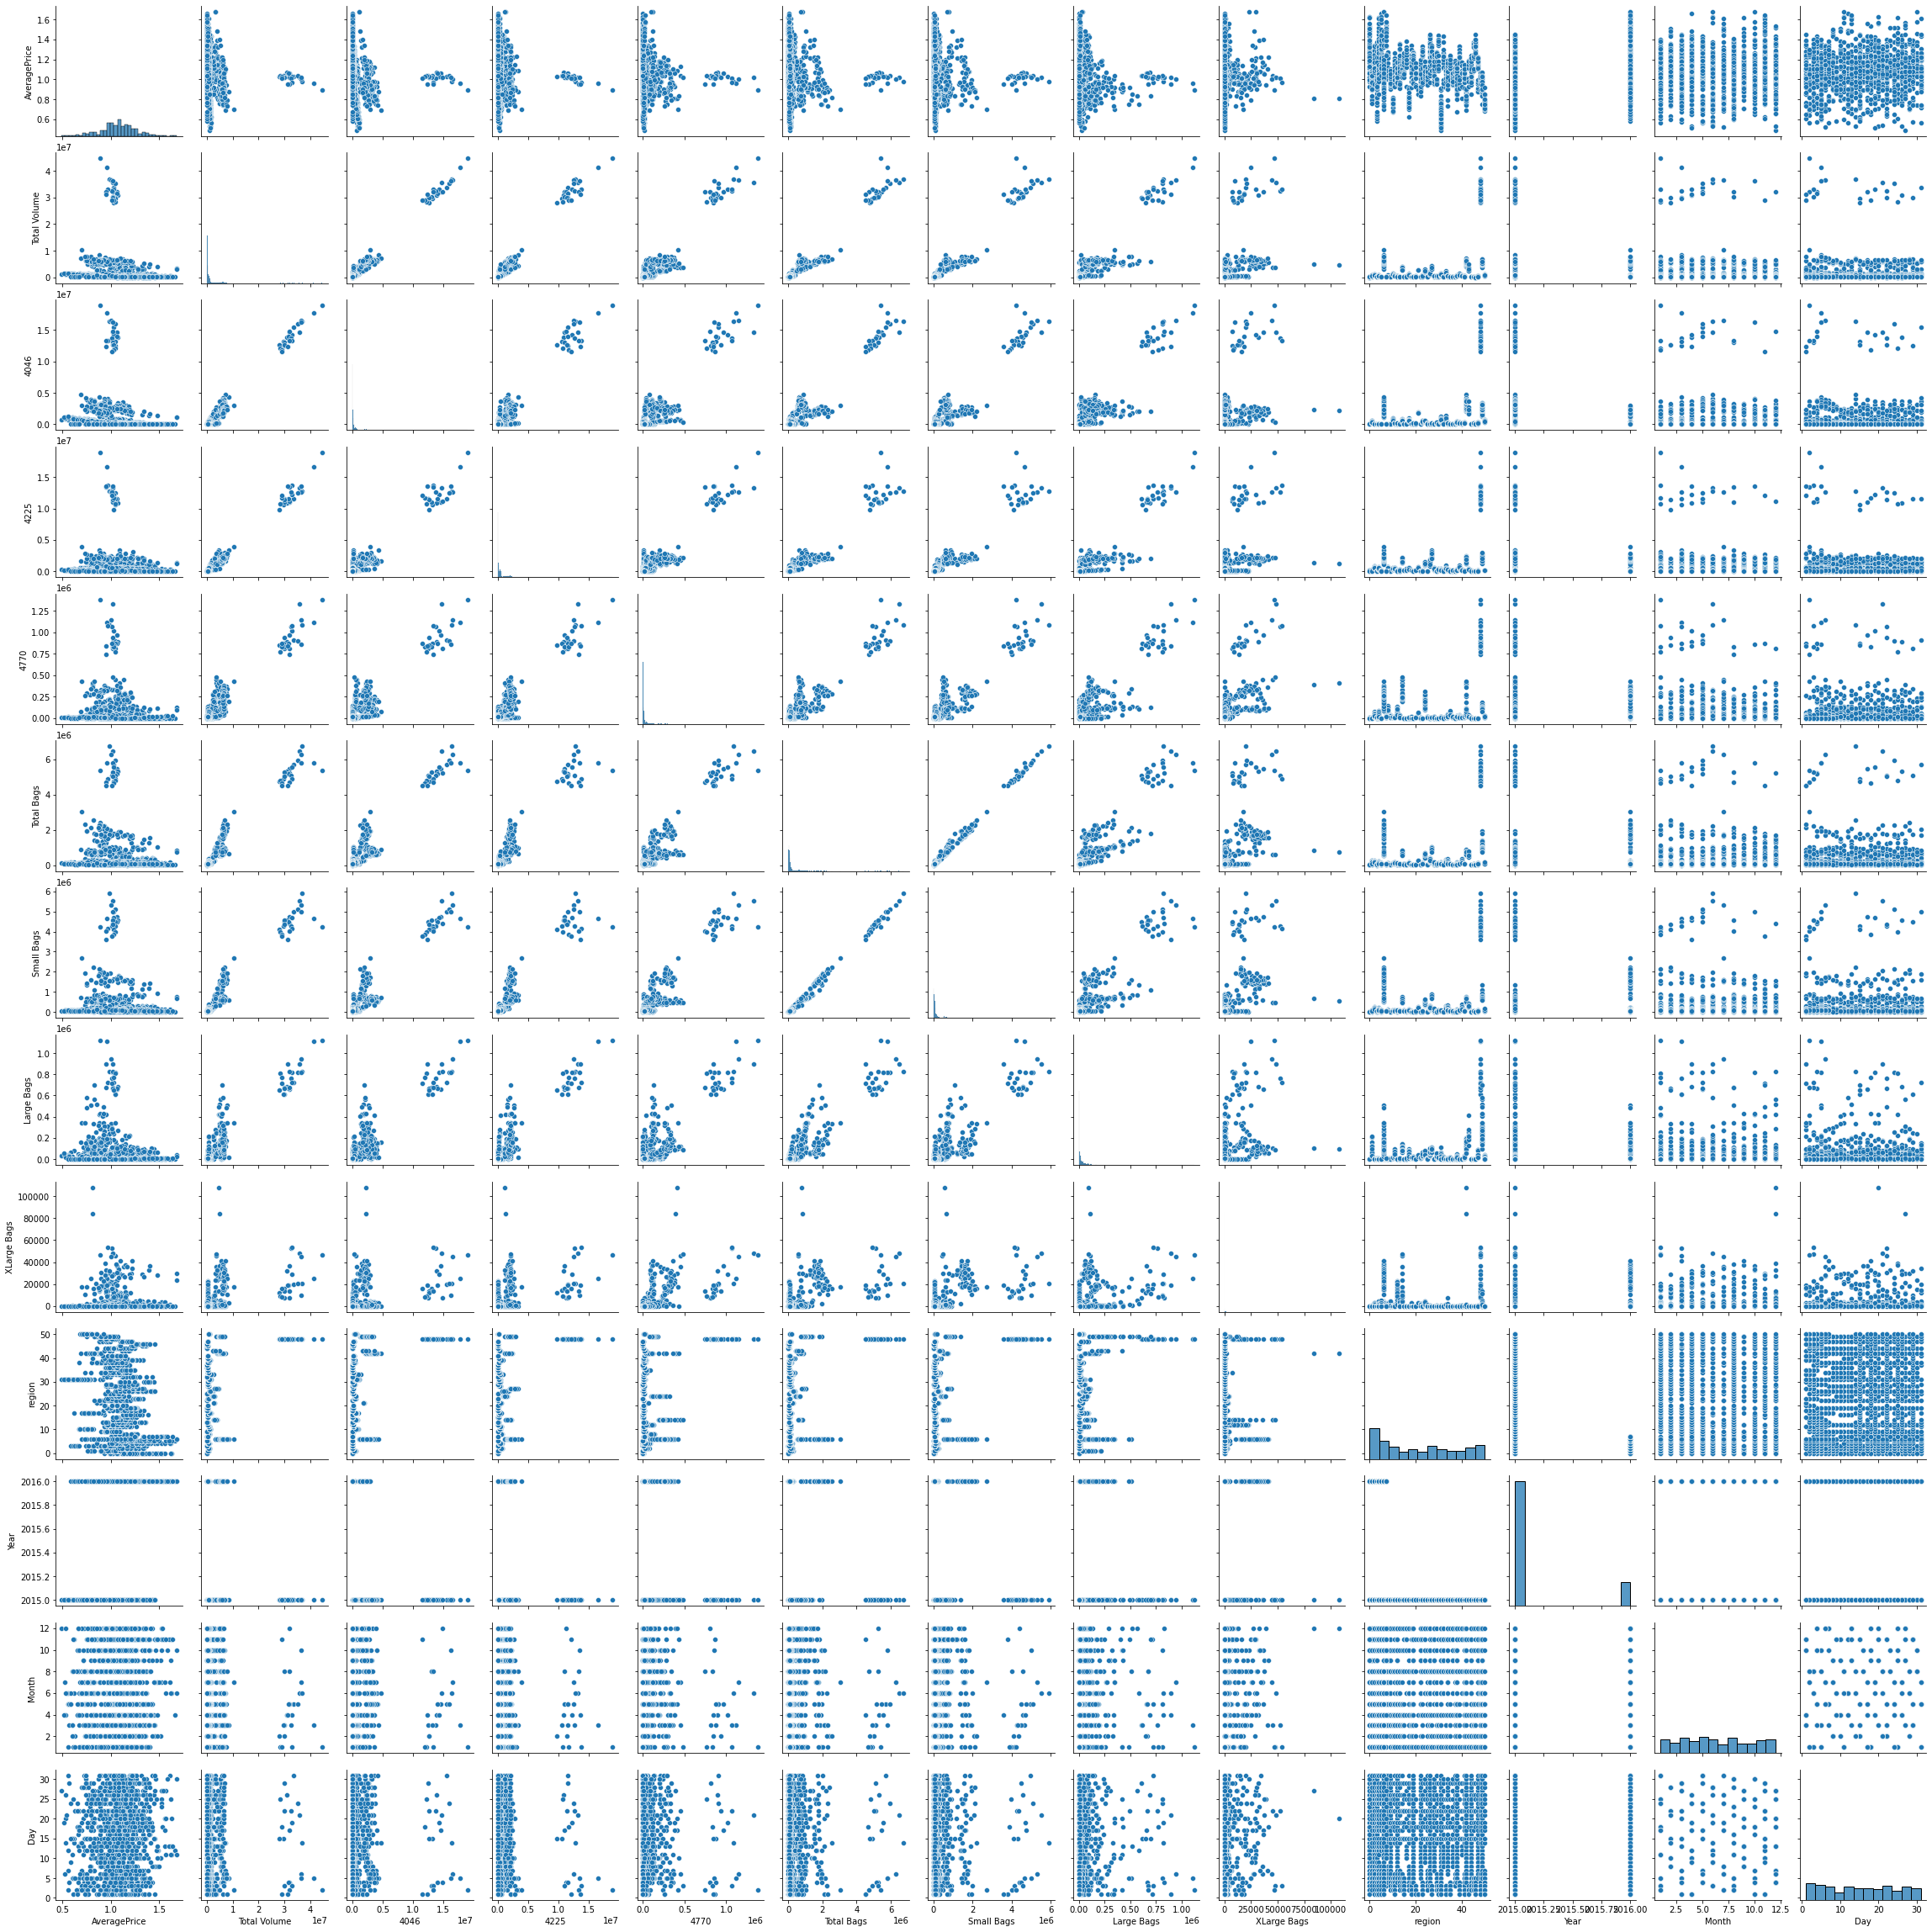

In [26]:
#Checking normal distribution of each column
sns.pairplot(df) 
plt.show

Checking outliers using Boxplot

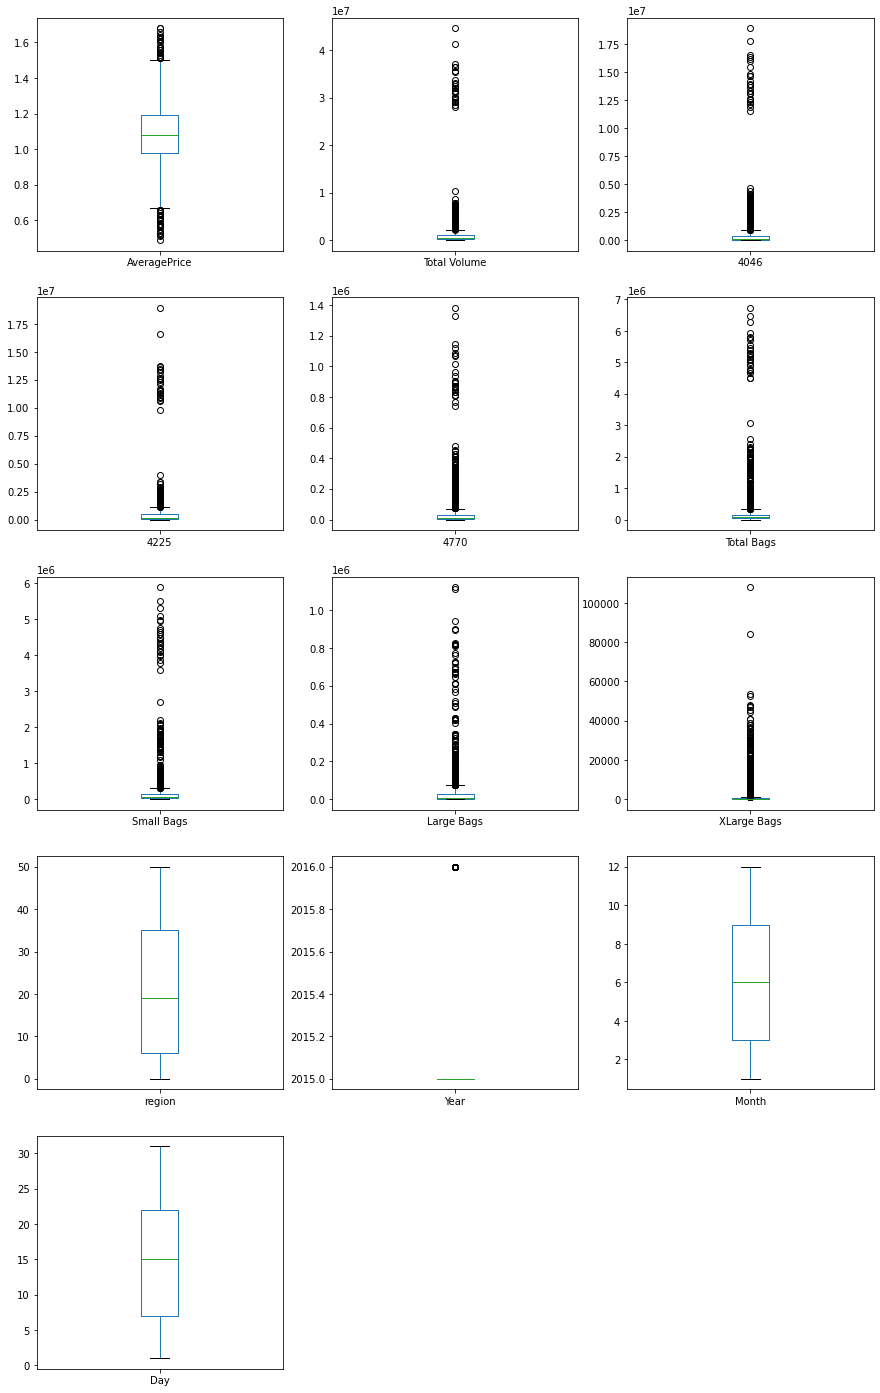

In [27]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

There are lot of ouliers and lets remove ouliers in next step.

Removing Outliers

In [28]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [29]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 13)
(1436, 13)


In [30]:
loss_percent=((1517-1436)/1517)*100
loss_percent

5.339485827290705

Here we loss only 5.3% of data, so we remove outliers.

Checking Skewness

In [31]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
Year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

Splitting Data in x(independent) and y(dependent)

In [32]:
x = df_new.drop('AveragePrice', axis = 1)
y = df_new['AveragePrice']

In [33]:
#removing skewness
from sklearn.preprocessing import power_transform 
#using yeo-johnson method due to presence of negative skewness
x_new = power_transform(x, method='yeo-johnson')        
x_new = pd.DataFrame(x_new, columns = x.columns)

In [34]:
x_new.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
region         -0.219708
Year            2.004439
Month          -0.136692
Day            -0.212755
dtype: float64

Skewness has been Removed.

In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x_new)

In [37]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(1436, 12)
(1436,)


Checking Best Random State

In [38]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = DecisionTreeRegressor()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    r2 = r2_score(y_test, predLR)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.7605785375213472 on Random State 251


Creating Model

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=141)

In [40]:
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']

r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2.append(r2_score(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
    
d={'Model':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.336532,0.121121,0.024310,0.155915
1,SVR,0.763231,0.073948,0.008675,0.093141
2,DecisionTreeRegressor,0.756204,0.066821,0.008933,0.094513
3,KNeighborsRegressor,0.686193,0.085118,0.011498,0.107228
4,RandomForestRegressor,0.820652,0.058935,0.006571,0.081064
5,AdaBoostRegressor,0.594580,0.099518,0.014855,0.121880
6,GradientBoostingRegressor,0.771513,0.070223,0.008372,0.091498


RandomForestRegressor have bext r2_score and less errors compare to remaining models. But we check Cross_validation_score for best Model.

Checking Cross Validation score

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cross=[]
kf = KFold(n_splits=5, random_state=251, shuffle=True)
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=kf)
    cross.append(scr.mean())   
difference={'Model':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model,R2_score,Cross_val_score
0,LinearRegression,0.336532,0.347613
1,SVR,0.763231,0.727682
2,DecisionTreeRegressor,0.756204,0.684167
3,KNeighborsRegressor,0.686193,0.690456
4,RandomForestRegressor,0.820652,0.814831
5,AdaBoostRegressor,0.594580,0.604239
6,GradientBoostingRegressor,0.771513,0.736058


The difference of R2_score and Cross_validation_score for KNeighborsRegressor is less, but the RandomForestRegressor have less errors compared to other model. So we consider RandomForestRegressor as our best model and performing the hyper Tunning.

HyperTuning

In [42]:
from sklearn.model_selection import GridSearchCV

RFC_parameters={'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50],
             }

In [43]:
RFC=GridSearchCV(RandomForestRegressor(),RFC_parameters,cv=5) #tuning the model

In [44]:
RFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]})

In [45]:
RFC.best_params_ #finding the best parameters for tuning

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [46]:
RFC = RandomForestRegressor(bootstrap=False, max_depth=30,min_samples_leaf = 1, min_samples_split= 2,
                            max_features = 'sqrt', n_estimators = 50)
RFC.fit(x_train,y_train)
print("Score=",RFC.score(x_train,y_train))
predrfc = RFC.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predrfc))
print('Mean squared Error= ', mean_squared_error(y_test,predrfc))
print('Root Mean Absolute Error=', np.sqrt(mean_absolute_error(y_test,predrfc)))
print('\nR2 Score=',r2_score(y_test,predrfc))

Score= 1.0
Mean Absolute Error=  0.056590719257540584
Mean squared Error=  0.005462733828306263
Root Mean Absolute Error= 0.23788803933266714

R2 Score= 0.8509085144723496


Lets plot the final Graph for Actual and Predicted output values

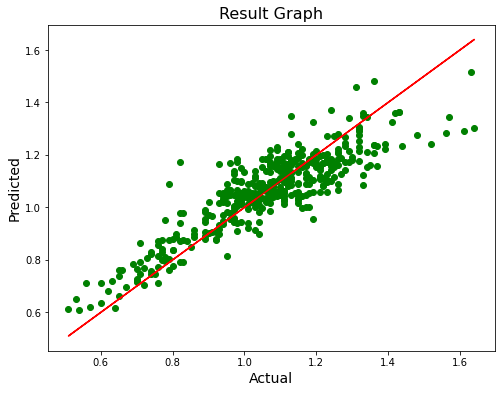

In [47]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

Saving Model

In [48]:
import pickle, joblib
filename = 'avacado.pkl'
pickle.dump(RFC , open(filename, 'wb'))

Result

In [49]:
RFC=joblib.load('avacado.pkl','rb')
Predicted = RFC.predict(x_test)
Predicted

array([1.0194, 0.8258, 1.192 , 1.1744, 1.1144, 1.2658, 0.939 , 1.0326,
       1.0576, 1.2172, 1.0118, 1.1662, 1.0402, 1.1284, 1.0034, 1.016 ,
       1.04  , 1.3258, 1.3572, 0.725 , 1.0288, 1.0262, 0.9904, 1.2946,
       1.0354, 0.8178, 1.0926, 1.0034, 0.7788, 1.1392, 1.0878, 0.9456,
       1.0526, 1.2848, 1.096 , 1.1768, 1.0252, 1.1034, 1.1426, 1.063 ,
       0.9984, 1.0254, 0.846 , 1.1876, 1.152 , 1.0992, 1.055 , 1.2172,
       0.8118, 1.4468, 1.1758, 1.134 , 1.0778, 1.0882, 1.1272, 1.0634,
       1.099 , 1.249 , 0.7152, 1.1624, 1.096 , 1.328 , 0.7522, 1.1788,
       1.0316, 1.0124, 1.1686, 1.0366, 0.9696, 0.6912, 0.9644, 0.7832,
       1.0904, 1.0824, 1.2102, 0.785 , 1.1028, 1.0738, 1.1672, 1.1814,
       1.3154, 1.2296, 1.1548, 0.992 , 1.0844, 0.7734, 1.085 , 0.7852,
       1.028 , 1.1186, 1.0448, 1.0884, 0.759 , 1.095 , 1.1916, 1.0576,
       1.2426, 0.7104, 0.965 , 1.0154, 1.2332, 1.058 , 1.1614, 1.1196,
       0.982 , 1.1878, 0.831 , 1.1788, 1.2628, 0.7686, 1.0778, 1.3314,
      

In [50]:
predict=np.array(RFC.predict(x_test))
predict

array([1.0194, 0.8258, 1.192 , 1.1744, 1.1144, 1.2658, 0.939 , 1.0326,
       1.0576, 1.2172, 1.0118, 1.1662, 1.0402, 1.1284, 1.0034, 1.016 ,
       1.04  , 1.3258, 1.3572, 0.725 , 1.0288, 1.0262, 0.9904, 1.2946,
       1.0354, 0.8178, 1.0926, 1.0034, 0.7788, 1.1392, 1.0878, 0.9456,
       1.0526, 1.2848, 1.096 , 1.1768, 1.0252, 1.1034, 1.1426, 1.063 ,
       0.9984, 1.0254, 0.846 , 1.1876, 1.152 , 1.0992, 1.055 , 1.2172,
       0.8118, 1.4468, 1.1758, 1.134 , 1.0778, 1.0882, 1.1272, 1.0634,
       1.099 , 1.249 , 0.7152, 1.1624, 1.096 , 1.328 , 0.7522, 1.1788,
       1.0316, 1.0124, 1.1686, 1.0366, 0.9696, 0.6912, 0.9644, 0.7832,
       1.0904, 1.0824, 1.2102, 0.785 , 1.1028, 1.0738, 1.1672, 1.1814,
       1.3154, 1.2296, 1.1548, 0.992 , 1.0844, 0.7734, 1.085 , 0.7852,
       1.028 , 1.1186, 1.0448, 1.0884, 0.759 , 1.095 , 1.1916, 1.0576,
       1.2426, 0.7104, 0.965 , 1.0154, 1.2332, 1.058 , 1.1614, 1.1196,
       0.982 , 1.1878, 0.831 , 1.1788, 1.2628, 0.7686, 1.0778, 1.3314,
      

In [52]:
Final=np.array(y_test)
Final

array([1.03, 0.77, 1.15, 1.13, 1.1 , 1.39, 0.93, 1.07, 0.99, 1.16, 0.99,
       1.16, 1.04, 1.11, 0.97, 1.03, 1.03, 1.29, 1.24, 0.76, 1.01, 1.03,
       0.94, 1.13, 1.01, 0.79, 1.1 , 1.02, 0.8 , 1.17, 1.18, 1.04, 0.99,
       1.27, 1.1 , 1.15, 1.01, 1.11, 1.08, 1.09, 0.94, 0.95, 0.8 , 1.05,
       1.13, 1.15, 1.07, 1.29, 0.76, 1.61, 1.14, 1.11, 1.21, 0.93, 1.23,
       1.09, 1.1 , 1.19, 0.74, 1.26, 1.11, 1.26, 0.78, 1.16, 1.02, 0.98,
       1.23, 1.17, 0.9 , 0.72, 0.99, 0.75, 1.1 , 0.96, 1.19, 0.8 , 1.17,
       0.99, 1.23, 1.3 , 1.32, 1.24, 1.21, 0.95, 1.06, 0.71, 1.12, 0.79,
       1.03, 1.21, 1.08, 1.01, 0.73, 1.13, 1.23, 1.13, 1.32, 0.62, 0.98,
       1.05, 1.28, 1.11, 1.22, 1.33, 1.01, 1.19, 0.76, 1.22, 1.24, 0.63,
       1.01, 1.52, 1.09, 1.23, 1.19, 0.91, 1.13, 1.08, 1.01, 1.04, 1.13,
       1.07, 1.11, 0.53, 1.18, 1.34, 1.2 , 0.99, 1.08, 1.36, 1.07, 1.13,
       1.07, 1.07, 1.11, 1.13, 1.19, 1.56, 0.7 , 1.12, 0.86, 0.92, 1.32,
       1.04, 0.8 , 1.16, 1.24, 0.86, 1.14, 1.44, 1.

In [53]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,1.03,1.0194
1,0.77,0.8258
2,1.15,1.1920
3,1.13,1.1744
4,1.10,1.1144
...,...,...
426,1.15,1.2608
427,0.93,1.0612
428,0.93,1.0622
429,1.43,1.3646


We have used RandomForestRegressor in this dataset and achieve the accuracy score.It is also used for predicting the Averageprice of the Avacado.